In [95]:
from IPython.display import HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Python Course Lecture 7b:Intro to Functional Programming and its Applications: 
  - **Data Aggregation** in Pandas
  - **Parallel Processing** using multiprocessing.map()
  - **Graphical Interfaces** using ipywidgets.interact()

# Different Tasks and Languages Encourage Different Programming Paradigms

## Python is a Multi-Paradigm Language.  
This means that Python supports programming according to different manners of thinking:
  - **Procedural Programming**: Telling the computer what to do in a step-by-step manner.
  - **Functional Programming**: Telling the computer a set of transformations to perform.
  - **Object-Oriented Programming**: Telling the computer how certain data should be stored and handled by describing its qualities.
  - **Declarative Programming**: Telling the computer what result you want.

# Paradigm Example: Building a Sandwich

## Procedural: Building a Sandwich
"Grasp the drawer handle and pull it towards you 10cm. Take a knife, located in the 3rd compartment from the drawer into your hand. Push the drawer handle until it resists pressure. Place the bread on the table. Twice now: Hold the knife above the bread, then move it down 1cm from its end, pulling away the smallest segment and laying it flat on the table.  Open the refrigerator. Take some cheese from the refrigerator. Close the refrigerator..."


## Functional: Building a Sandwich
  - **Getting** means opening something and removing the specified object, then closing that something.
  - **Slicing** means pushing a knife through something and removing the small segment that is removed.
  - **Stacking** means placing all things on top of one another in the order specified, resulting in a single thing.

"**Get** a Knife. **Get** and **Slice** and **Stack** the Bread and Cheese"

## Object-Oriented: Building a Sandwich
  - **Containers** can be opened and closed. They can also contain Things that can be added or removed.
  - **Things** can be Taken.
  - **Food** is a **Thing**.  It can be sliced and eaten.
  - **SharpObjects** are **Things**. They can slice things.
  - The **Drawer** and **Refrigerator** are **Containers**. 
  - The **Bread** and **Cheese** are **Food**.
  - The **Drawer** **Contains** the **Knife**.  
  
  

## Declarative: Building a Sandwich

"Give me a cheese sandwich, please."

# Functional Programming in Python: 
## "Applying Functions to Data"

## Review: Making Functions

In [32]:
def add(args):
    return sum(args)

add([1, 2, 3])

6

## Python Functions can be Renamed.  They are also Objects!

In [33]:
total = add
total([1, 2, 3])

6

In [34]:
type(total)

function

## Lambda Functions: Make a Function in a single line.

In [26]:
add2 = lambda x: x + 2
add2(5)

7

In [25]:
mult = lambda x,y: x*y
mult(3, 5)

15

## Python Functions can be put in other functions
Demo: The **apply()** function (included in Python2, not 3) calls a function on data.

In [6]:
def apply(fun, data):
    return fun(data)
    
apply(sum, [1, 2, 3])

6

## Pandas Aggregation: Another example of Functions applying Functions
From last week's homework:
```python
LogRT.agg({'Mean': np.mean, 'STD': np.std})
```

In [98]:
HTML('<table border="1">\n <thead>\n <tr style="text-align: right;">\n <th></th>\n <th>STD</th>\n  <th>Mean</th>\n </tr>\n  <tr>\n      <th>UserID</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>156772</th>\n      <td>0.287129</td>\n      <td>7.161207</td>\n    </tr>\n    <tr>\n      <th>156839</th>\n      <td>0.525333</td>\n      <td>6.513287</td>\n    </tr>\n    <tr>\n      <th>156856</th>\n      <td>0.316302</td>\n      <td>6.942405</td>\n    </tr>\n    <tr>\n      <th>156857</th>\n      <td>0.424438</td>\n      <td>7.176462</td>\n    </tr>\n  </tbody>\n</table>')

,STD,Mean
UserID,,
156772,0.287129,7.161207
156839,0.525333,6.513287
156856,0.316302,6.942405
156857,0.424438,7.176462


## map()
Applying a Function on each element in a collection is called **Mapping** a Function to Data.

In [93]:
def square(x): 
    return x ** 2

list(map(square, range(10)))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [92]:
[el ** 2 for el in range(10)]  

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

## lambda is often used for simple maps

In [103]:
list(map(lambda x: x ** 2, range(10)))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

## Mapping can be used for parallel processing.  

In [105]:
maxval = 10000000
%timeit list(map(square, range(maxval)))

from multiprocessing import Pool
workers = Pool(3) # Make a collection of 3 "workers" to do the work independently
%timeit workers.map(square, range(maxval))
workers.close()

1 loop, best of 3: 2.69 s per loop
1 loop, best of 3: 1.46 s per loop


# Intro to Interactive Jupyter Widgets

Now, we'll use the functional approach to make interactive plots in our Jupyter Notebooks.


In [107]:
import ipywidgets
from ipywidgets import interact

## Widgets are Parts of a Graphical Interface

In [108]:
ipywidgets.Text('This is Text')

In [89]:
ipywidgets.IntSlider(3, min=-10, max=10)

### Project: Interact with Sine-waves
The **ipywidgets.interact()** function is a quick-and-dirty way to generate widgets for controlling functions.  By default, it will try to choose an appropriate widget given the argument's type.

In [109]:
def sin(x):
    return np.sin(x)

interact(sin, x=1.)

0.90929742682568171

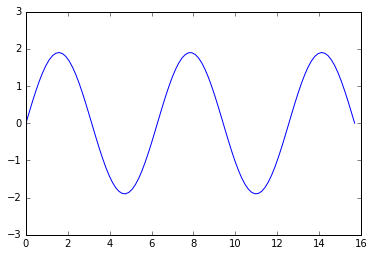

In [67]:
def plot_sin(amplitude):
    x = np.linspace(0, 5 * np.pi, 100)
    y = amplitude * np.sin(x)
    plt.plot(x, y)
    plt.ylim(-3, 3)
    
interact(plot_sin, amplitude=1.)

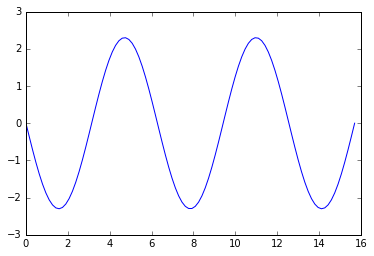

In [111]:
def plot_sin(amplitude):
    x = np.linspace(0, 5 * np.pi, 100)
    y = amplitude * np.sin(x)
    plt.plot(x, y)
    plt.ylim(-3, 3)
    
interact(plot_sin, amplitude=ipywidgets.FloatSlider(0., min=-3, max=3))

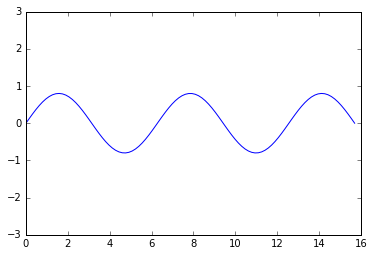

In [114]:
def plot_sin(amplitude=0.):
    x = np.linspace(0, 5 * np.pi, 100)
    y = amplitude * np.sin(x)
    plt.plot(x, y)
    plt.ylim(-3, 3)
    
interact(plot_sin)

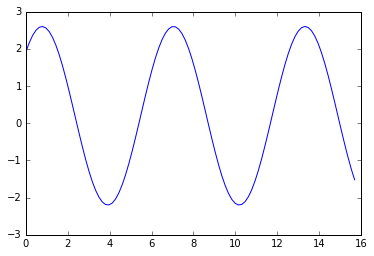

In [70]:
def plot_sin(amplitude, theta, offset):
    x = np.linspace(0, 5 * np.pi, 100)
    y = amplitude * np.sin(x + theta) + offset
    plt.plot(x, y)
    plt.ylim(-3, 3)
    
interact(plot_sin, amplitude=1., theta=0., offset=0.)

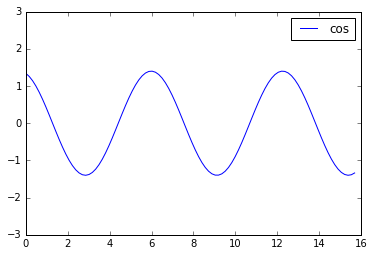

In [119]:
def plot_fun(fun, amplitude=1., theta=0., offset=0.):
    x = np.linspace(0, 5 * np.pi, 100)
    y = amplitude * fun(x + theta) + offset
    plt.plot(x, y, label=fun.__name__); plt.ylim(-3, 3); plt.legend()
    
interact(plot_fun, fun={'sin': np.sin, 'cos': np.cos})

## Conclusion:  Functional Programming is as simple as apply(fun, data)!